## WeatherPy

In [4]:
 # Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import requests
import time
from citipy import citipy
import seaborn
import random

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Generate Cities List

In [5]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# List for holding lat_lngs and cities
lat_lngs = []
cities = []
#city_data = []

# Create a set of random lat and lng combinations
lat = np.random.uniform(low=-90.000, high=90.000, size=1500)
lng = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lat, lng)

weather_df = pd.DataFrame({"Latitude": lat, "Longitude": lng})
weather_df.head()

,Latitude,Longitude
0,50.842260,137.297654
1,-21.122261,-163.799736
2,-37.622394,-70.516379
3,38.088146,52.034040
4,62.622814,-56.586355


In [6]:
#Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    #If the city is unique, then add it to a our cities list
    if city not in cities: #city_data:
        cities.append(city)

#Print the city count to confirm sufficient count
len(cities)

611

# Perform API Calls

In [7]:
 # OpenWeatherMap API Key
api_key = "5e8beccd07c0d11ff6ded6e2aa57281c"

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

In [8]:
for x in cities:
        print(x)

solnechnyy
avarua
coihueco
fereydun kenar
maniitsoq
jogindarnagar
brae
puerto ayora
bredasdorp
longlac
ushuaia
abu kamal
mataura
kodiak
touros
lorengau
port elizabeth
east london
castro
karkaralinsk
lebu
cherskiy
thompson
rikitea
hambantota
adrar
matara
albany
busselton
reguengos de monsaraz
fairbanks
sao joao da barra
cape town
arraial do cabo
develi
amderma
pevek
nicoya
lakselv
carnarvon
clyde river
bluff
illoqqortoormiut
punta arenas
ribeira grande
vila velha
haifa
timra
provideniya
bambous virieux
road town
yellowknife
lakatoro
opuwo
port alfred
torbay
nome
the valley
qaanaaq
hermanus
santa teresa
jamestown
dolores
khatanga
taoudenni
sola
barentsburg
mount isa
upernavik
pimentel
atherton
georgetown
black river
dikson
saldanha
vaini
esperance
inhambane
talnakh
la ronge
hilo
vila franca do campo
grand river south east
umm lajj
kudat
mangai
golden
halifax
hithadhoo
kindu
alofi
faanui
nizhneyansk
atuona
kapaa
narasannapeta
richards bay
cabo san lucas
haverfordwest
laguna
buala
igrim
ch

In [9]:
# Build query URL
query_url = url + "&q=" + city

# Get weather data
weather_response = requests.get(query_url)
weather_json = weather_response.json()

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

#print(f"The weather API responded with: {weather_json}.")

# Create counters
record_count = 1
set_count = 1
units = "imperial"

city_data = []

# Loop through the list of cities and perform a request for data on each
# Loop through all the cities in our list

for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

         # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
       
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    
    record_count += 1
    
    time.sleep(0.05)

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | solnechnyy
Processing Record 3 of Set 1 | avarua
Processing Record 5 of Set 1 | coihueco
Processing Record 7 of Set 1 | fereydun kenar
Processing Record 9 of Set 1 | maniitsoq
Processing Record 11 of Set 1 | jogindarnagar
Processing Record 13 of Set 1 | brae
Processing Record 15 of Set 1 | puerto ayora
Processing Record 17 of Set 1 | bredasdorp
Processing Record 19 of Set 1 | longlac
City not found. Skipping...
Processing Record 21 of Set 1 | ushuaia
Processing Record 23 of Set 1 | abu kamal
Processing Record 25 of Set 1 | mataura
Processing Record 27 of Set 1 | kodiak
Processing Record 29 of Set 1 | touros
Processing Record 31 of Set 1 | lorengau
Processing Record 33 of Set 1 | port elizabeth
Processing Record 35 of Set 1 | east london
Processing Record 37 of Set 1 | castro
Processing Record 39 of Set 1 | karkaralinsk
City not found. Skipping...
Processing Record 41 of Set 1 | lebu
Processing Re

Processing Record 70 of Set 4 | chipinge
Processing Record 72 of Set 4 | tuktoyaktuk
Processing Record 74 of Set 4 | bocaiuva
Processing Record 76 of Set 4 | dali
Processing Record 78 of Set 4 | qaqortoq
Processing Record 80 of Set 4 | lavrentiya
Processing Record 82 of Set 4 | wick
Processing Record 84 of Set 4 | seymchan
Processing Record 86 of Set 4 | butaritari
Processing Record 88 of Set 4 | yar-sale
Processing Record 90 of Set 4 | acapulco
Processing Record 92 of Set 4 | sorland
Processing Record 94 of Set 4 | innisfail
Processing Record 96 of Set 4 | bubaque
Processing Record 98 of Set 4 | saskylakh
Processing Record 0 of Set 5 | ust-kuyga
Processing Record 2 of Set 5 | broken hill
Processing Record 4 of Set 5 | hofn
Processing Record 6 of Set 5 | iqaluit
Processing Record 8 of Set 5 | fomboni
Processing Record 10 of Set 5 | atar
Processing Record 12 of Set 5 | jungapeo
Processing Record 14 of Set 5 | mar del plata
Processing Record 16 of Set 5 | dromolaxia
Processing Record 18 

Processing Record 40 of Set 8 | san felipe
Processing Record 42 of Set 8 | kiama
Processing Record 44 of Set 8 | vardo
Processing Record 46 of Set 8 | talcahuano
Processing Record 48 of Set 8 | vanavara
Processing Record 50 of Set 8 | te anau
Processing Record 52 of Set 8 | arcani
Processing Record 54 of Set 8 | healesville
Processing Record 56 of Set 8 | pangnirtung
Processing Record 58 of Set 8 | airai
Processing Record 60 of Set 8 | santa cecilia
Processing Record 62 of Set 8 | vao
Processing Record 64 of Set 8 | loncoche
Processing Record 66 of Set 8 | dasoguz
Processing Record 68 of Set 8 | praia da vitoria
Processing Record 70 of Set 8 | bahraich
Processing Record 72 of Set 8 | udachnyy
Processing Record 74 of Set 8 | khorramabad
Processing Record 76 of Set 8 | sao joao do piaui
Processing Record 78 of Set 8 | wundanyi
Processing Record 80 of Set 8 | suntar
Processing Record 82 of Set 8 | bandarbeyla
Processing Record 84 of Set 8 | saint-joseph
Processing Record 86 of Set 8 | vos

Processing Record 12 of Set 12 | ust-nera
Processing Record 14 of Set 12 | nanortalik
Processing Record 16 of Set 12 | balkhash
Processing Record 18 of Set 12 | cabedelo
Processing Record 20 of Set 12 | amboasary
Processing Record 22 of Set 12 | ambodifototra
City not found. Skipping...
Processing Record 24 of Set 12 | isangel
Processing Record 26 of Set 12 | kuche
City not found. Skipping...
Processing Record 28 of Set 12 | nassau
Processing Record 30 of Set 12 | otradnoye
Processing Record 32 of Set 12 | turinskaya sloboda
Processing Record 34 of Set 12 | veraval
Processing Record 36 of Set 12 | bababe
City not found. Skipping...
Processing Record 38 of Set 12 | albina
Processing Record 40 of Set 12 | kinango
Processing Record 42 of Set 12 | beringovskiy
Processing Record 44 of Set 12 | lima
Processing Record 46 of Set 12 | guozhen
Processing Record 48 of Set 12 | lac du bonnet
Processing Record 50 of Set 12 | port lincoln
Processing Record 52 of Set 12 | neiafu
Processing Record 54 

In [10]:
city_data

[{'City': 'solnechnyy',
  'Lat': 50.72,
  'Lng': 136.64,
  'Max Temp': 30.29,
  'Humidity': 88,
  'Cloudiness': 0,
  'Wind Speed': 3.71,
  'Country': 'RU',
  'Date': 1539195801},
 {'City': 'avarua',
  'Lat': -21.21,
  'Lng': -159.78,
  'Max Temp': 73.4,
  'Humidity': 73,
  'Cloudiness': 75,
  'Wind Speed': 8.05,
  'Country': 'CK',
  'Date': 1539194400},
 {'City': 'coihueco',
  'Lat': -36.63,
  'Lng': -71.83,
  'Max Temp': 60.8,
  'Humidity': 59,
  'Cloudiness': 0,
  'Wind Speed': 12.75,
  'Country': 'CL',
  'Date': 1539190800},
 {'City': 'fereydun kenar',
  'Lat': 36.69,
  'Lng': 52.52,
  'Max Temp': 64.4,
  'Humidity': 88,
  'Cloudiness': 0,
  'Wind Speed': 2.24,
  'Country': 'IR',
  'Date': 1539190800},
 {'City': 'maniitsoq',
  'Lat': 65.42,
  'Lng': -52.9,
  'Max Temp': 27.41,
  'Humidity': 100,
  'Cloudiness': 0,
  'Wind Speed': 4.61,
  'Country': 'GL',
  'Date': 1539195802},
 {'City': 'jogindarnagar',
  'Lat': 31.98,
  'Lng': 76.77,
  'Max Temp': 51.71,
  'Humidity': 76,
  'Cloudi

In [11]:
# Assemble data into dataframe
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,solnechnyy,0,RU,1539195801,88,50.72,136.64,30.29,3.71
1,avarua,75,CK,1539194400,73,-21.21,-159.78,73.40,8.05
2,coihueco,0,CL,1539190800,59,-36.63,-71.83,60.80,12.75
3,fereydun kenar,0,IR,1539190800,88,36.69,52.52,64.40,2.24
4,maniitsoq,0,GL,1539195802,100,65.42,-52.90,27.41,4.61


In [12]:
city_data_df.to_csv('WeatherPy.csv')                                            # exports dataframe to .csv file

In [13]:
# Remove any cities that have NaN values
city_data_df = city_data_df.dropna(how='any')

print(f"The data frame contains {len(city_data_df['City'])} unique cities.")

The data frame contains 553 unique cities.


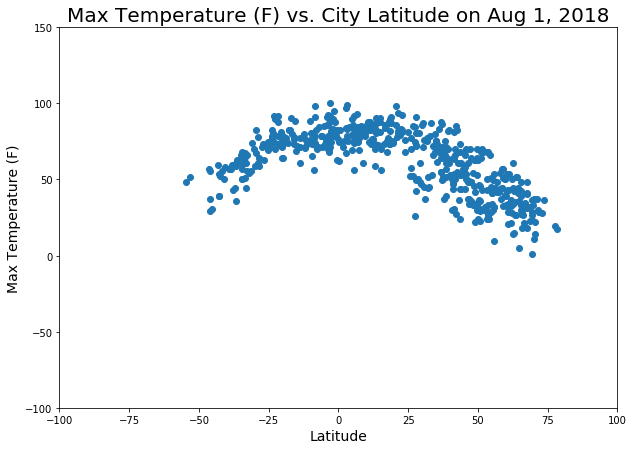

In [15]:
plt.figure(figsize=(10,7))
plt.scatter(pd.to_numeric(city_data_df["Lat"]), pd.to_numeric(city_data_df["Max Temp"]))
plt.title("Max Temperature (F) vs. City Latitude on Aug 1, 2018", fontsize=20)
plt.ylabel("Max Temperature (F)", fontsize=14)
plt.xlabel("Latitude", fontsize=14)
plt.ylim(-100, 150)
plt.xlim(-100, 100)
plt.savefig("TempvsLat.png")
plt.show()

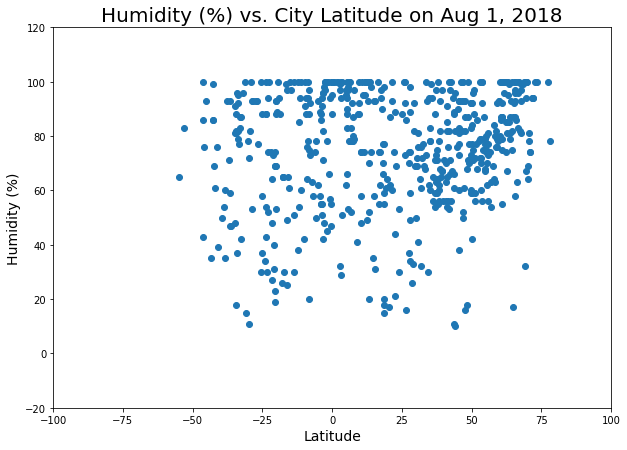

In [16]:
plt.figure(figsize=(10,7))
plt.scatter(pd.to_numeric(city_data_df["Lat"]), pd.to_numeric(city_data_df["Humidity"]))
plt.title("Humidity (%) vs. City Latitude on Aug 1, 2018", fontsize=20)
plt.ylabel("Humidity (%)", fontsize=14)
plt.xlabel("Latitude", fontsize=14)
plt.ylim(-20, 120)
plt.xlim(-100, 100)
plt.savefig("HumidvsLat.png")
plt.show()

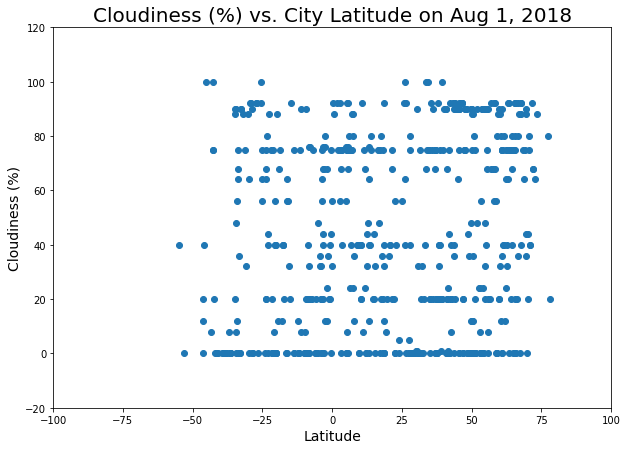

In [17]:
plt.figure(figsize=(10,7))
plt.scatter(pd.to_numeric(city_data_df["Lat"]), pd.to_numeric(city_data_df["Cloudiness"]))
plt.title("Cloudiness (%) vs. City Latitude on Aug 1, 2018", fontsize=20)
plt.ylabel("Cloudiness (%)", fontsize=14)
plt.xlabel("Latitude", fontsize=14)
plt.ylim(-20, 120)
plt.xlim(-100, 100)
plt.savefig("CloudvsLat.png")
plt.show()

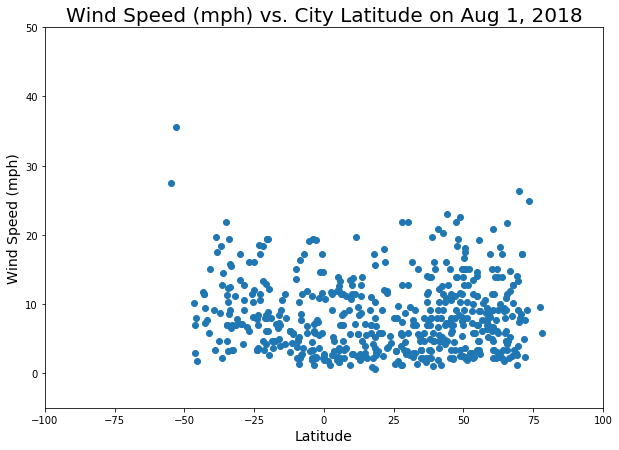

In [18]:
plt.figure(figsize=(10,7))
plt.scatter(pd.to_numeric(city_data_df["Lat"]), pd.to_numeric(city_data_df["Wind Speed"]))
plt.title("Wind Speed (mph) vs. City Latitude on Aug 1, 2018", fontsize=20)
plt.ylabel("Wind Speed (mph)", fontsize=14)
plt.xlabel("Latitude", fontsize=14)
plt.ylim(-5, 50)
plt.xlim(-100, 100)
plt.savefig("WindvsLat.png")
plt.show()

In [19]:
city_data_df.to_csv("WeatherPy.csv")

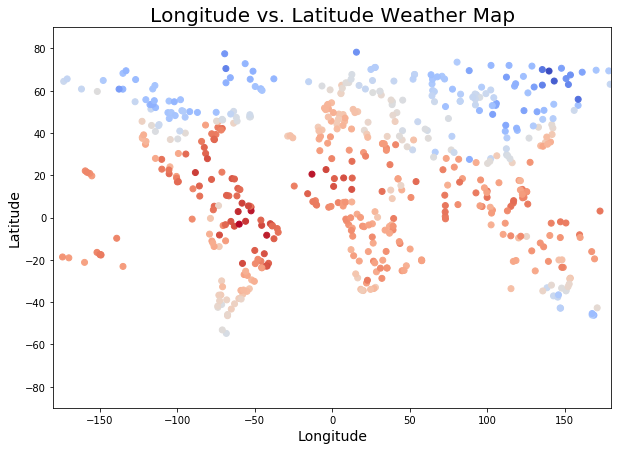

In [20]:
plt.figure(figsize=(10,7))
temperatures = pd.to_numeric(city_data_df["Max Temp"])
plt.scatter(pd.to_numeric(city_data_df["Lng"]), pd.to_numeric(city_data_df["Lat"]), c=temperatures, cmap='coolwarm')
plt.title("Longitude vs. Latitude Weather Map", fontsize=20)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.ylim(-90, 90)
plt.xlim(-180, 180)
plt.savefig("heatmap.png")
plt.show()

Your objective is to build a series of scatter plots to showcase the following relationships:


Temperature (F) vs. Latitude
Humidity (%) vs. Latitude
Cloudiness (%) vs. Latitude
Wind Speed (mph) vs. Latitude


Your final notebook must:


Randomly select at least 500 unique (non-repeat) cities based on latitude and longitude.
Perform a weather check on each of the cities using a series of successive API calls.
Include a print log of each city as it's being processed with the city number and city name.
Save both a CSV of all data retrieved and png images for each scatter plot.


As final considerations:


You must complete your analysis using a Jupyter notebook.
You must use the Matplotlib or Pandas plotting libraries.
You must include a written description of three observable trends based on the data.
You must use proper labeling of your plots, including aspects like: Plot Titles (with date of analysis) and Axes Labels.
See Example Solution for a reference on expected format.

# Observable trends

1. There appears to be a parabolic association between city latitude and city temperature. That is to say, the cities located on the extremes of latitude (-90 to +90) tend to be lower in temperature, whereas the cities located near 0 latitude tend to be higher in temperature.

2. There does not appear to be strong correlation between wind speed or humidity and latitude. There is probably some association on some level, whether more granular or more course, but it is not apparent (if any) at the current level. Interestingly, humidity vs. latitude and wind speed vs. latitude plots almost appear to be mirror images of each other. It would be possible to determine whether the highest density points on the respective plots correspond to the same cities. 

3. Another observable trend is cloudiness vs. latitude. This is a very interesting chart because it appears to have distinct periodicity interposed with randomness. I am not sure how precise the determination of cloudiness is made, but if it is "binned", it could explain the plot to an extent. But what is more likely occurring is a representation of true meteorlogical phenomena of nonlinear phase transitions of cloud formation between areas of higher density and lower density which results in large "wavelike" regions of clouds.